# 泰坦尼克号数据集可视化

## 导入数据

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 显示符号

train = pd.read_csv(r"D:\Downloads\train.csv")
print(train.shape)

(891, 12)


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 数据处理

可见Age，Cabin，Embarked有缺失
这里Age使用平均值填充，Cabin缺失较严重则不考虑分析该因素的影响，Embarked删去这仅缺失的记录

In [43]:
train["Age"] = train["Age"].fillna(train["Age"].mean())
train["Cabin"] = train["Cabin"].fillna('U')
train = train.drop(train[train.Embarked.isnull()].index)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


## 可视化

1. 总体生还率

In [30]:
n = train['Survived'].value_counts()
train['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

Text(0.5, 1.0, '总体生还率')

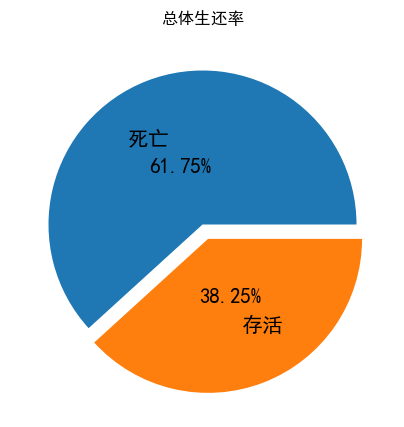

In [22]:
plt.figure(figsize=(5,5))
plt.pie(n,autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15))
plt.title('总体生还率')

2. 不同性别乘客生还率

In [23]:
sex_count = train.groupby(by='Sex')['Survived'].value_counts()
sex_count

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: count, dtype: int64

Text(0.5, 1.0, '男性生还率')

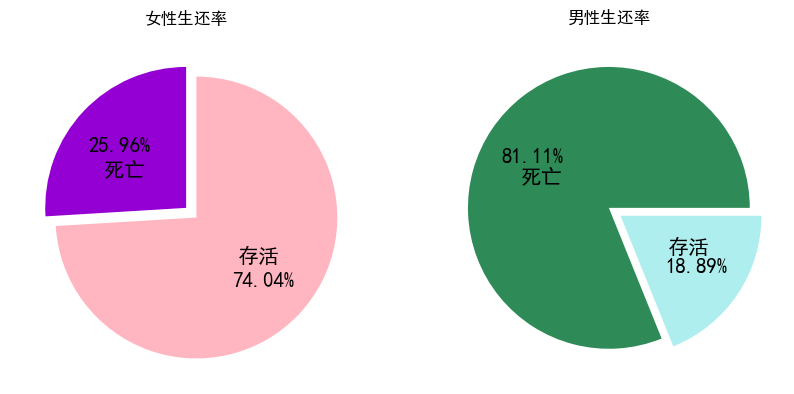

In [44]:
plt.figure(figsize=(2*5,5))

axes1=plt.subplot(1,2,1)
axes1.pie(sex_count.loc['female'][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.65,labeldistance=0.4,
      explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=90)
axes1.set_title('女性生还率')

axes2=plt.subplot(1,2,2)
axes2.pie(sex_count.loc['male'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.65,labeldistance=0.4,
       explode=[0,0.1],textprops=dict(size=15),colors=['#2E8B57','#AFEEEE'])
axes2.set_title('男性生还率')

3. 不同年龄乘客生还率
这一因素在清洗时使用均值填充缺失值，情况表现较为集中，此处仅做参考。。。

In [52]:
age_range = train['Age'] 
age_num,_ = np.histogram(age_range,range=[0,80],bins=16 )
age_num

array([ 40,  22,  16,  86, 114, 283,  95,  71,  48,  41,  32,  16,  14,
         4,   6,   1], dtype=int64)

In [54]:
age_survived = []
for age in range(5,81,5):
    survived_num = train.loc[(age_range>=age-5) & (age_range<=age)]['Survived'].sum()
    age_survived.append(survived_num)
age_survived

[31, 11, 11, 37, 45, 100, 51, 38, 23, 21, 15, 8, 5, 0, 0, 1]

Text(0.5, 1.0, '各年龄阶段人数及生还人数条形图')

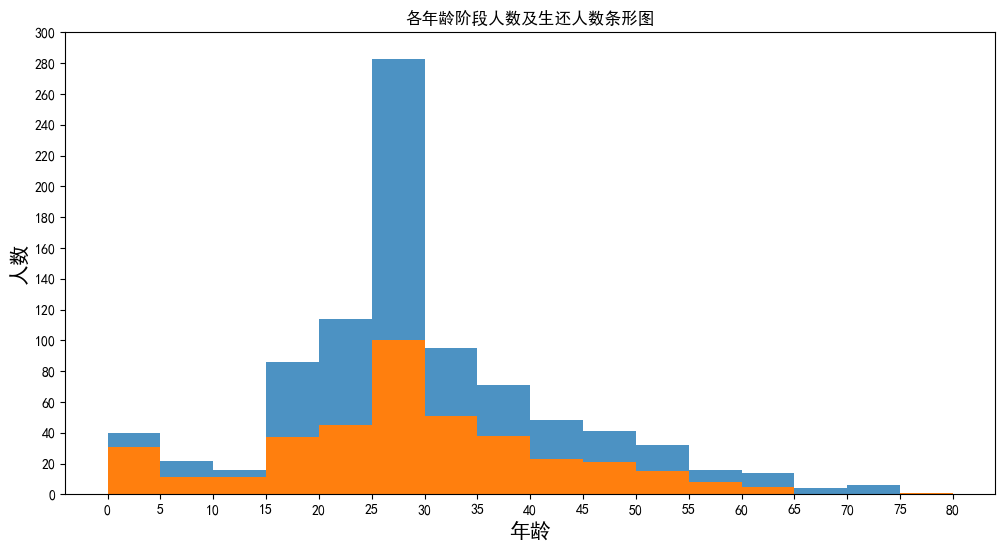

In [55]:
plt.figure(figsize=(12,6))
plt.bar(np.arange(2,78,5)+0.5,age_num,width=5,label='总人数',alpha=0.8)
plt.bar(np.arange(2,78,5)+0.5,age_survived,width=5,label='生还人数')
plt.xticks(range(0,81,5))
plt.yticks(range(0,301,20))
plt.xlabel('年龄',position=(0.95,0),fontsize=15)
plt.ylabel('人数',position=(0,0.95),fontsize=15)
plt.title('各年龄阶段人数及生还人数条形图')

4. 不同票价乘客生还率

In [66]:
# 不同票价乘客生还情况
fare_count = train.groupby(by='Fare')['Survived'].value_counts()
fare_count = pd.DataFrame(fare_count)
fare_count.rename(columns={'Survived':'Number'},inplace=True)
fare_count.reset_index(inplace=True)
fare_count

,Fare,Survived,count
0,0.0000,0,14
1,0.0000,1,1
2,4.0125,0,1
3,5.0000,0,1
4,6.2375,0,1
...,...,...,...
324,247.5208,0,1
325,262.3750,1,2
326,263.0000,0,2
327,263.0000,1,2


In [67]:
# 统计各票价乘客总人数
fare_num = fare_count.groupby(by='Fare')['count'].sum()
fare_num = pd.DataFrame(fare_num)
fare_num.rename(columns={'count':'Total'},inplace=True)
fare_num

,Total
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1
6.4375,1
...,...
227.5250,4
247.5208,2
262.3750,2


In [68]:
fare_survived = fare_count.loc[fare_count['Survived']==1]
fare_survived = fare_survived.merge(fare_num,left_on='Fare',right_index=True,how='inner')
fare_survived

,Fare,Survived,count,Total
1,0.0000,1,1,15
12,6.9750,1,1,2
17,7.1417,1,1,1
19,7.2250,1,3,12
21,7.2292,1,4,15
...,...,...,...,...
321,227.5250,1,3,4
323,247.5208,1,1,2
325,262.3750,1,2,2
327,263.0000,1,2,4


In [71]:
# 各票价乘客的生还率
survived_rate = fare_survived['count'].div(fare_survived['Total'])
survived_rate.index = fare_survived['Fare']
survived_rate

Fare
0.0000      0.066667
6.9750      0.500000
7.1417      1.000000
7.2250      0.250000
7.2292      0.266667
              ...   
227.5250    0.750000
247.5208    0.500000
262.3750    1.000000
263.0000    0.500000
512.3292    1.000000
Length: 152, dtype: float64

In [72]:
fare_death = fare_count.loc[fare_count['Survived']==0]
fare_death = fare_death.merge(fare_num,left_on='Fare',right_index=True,how='inner')
fare_death

,Fare,Survived,count,Total
0,0.0000,0,14,15
2,4.0125,0,1,1
3,5.0000,0,1,1
4,6.2375,0,1,1
5,6.4375,0,1,1
...,...,...,...,...
319,211.5000,0,1,1
320,221.7792,0,1,1
322,227.5250,0,1,4
324,247.5208,0,1,2


In [74]:
# 各票价乘客的死亡率
death_rate = fare_death['count'].div(fare_death['Total'])
death_rate.index = fare_death['Fare']
death_rate

Fare
0.0000      0.933333
4.0125      1.000000
5.0000      1.000000
6.2375      1.000000
6.4375      1.000000
              ...   
211.5000    1.000000
221.7792    1.000000
227.5250    0.250000
247.5208    0.500000
263.0000    0.500000
Length: 177, dtype: float64

Text(0.5, 1.0, '乘客死亡率和票价关系散点图')

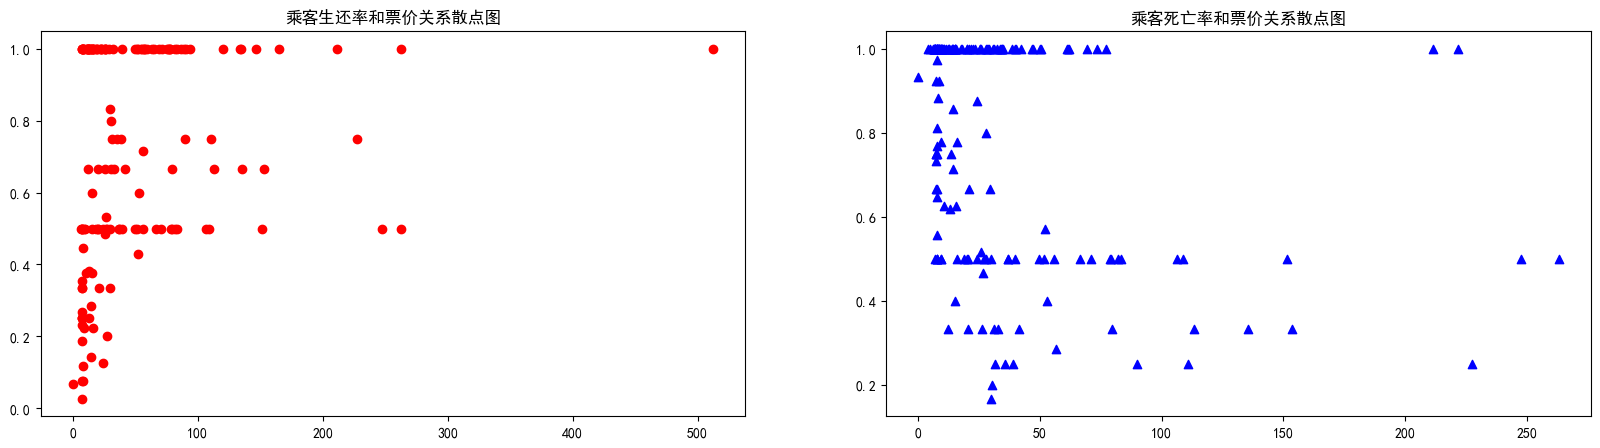

In [82]:
plt.figure(figsize=(2*10,5))

# 乘客生还率和票价关系散点图
axes1=plt.subplot(1,2,1)
axes1.scatter(survived_rate.index,survived_rate,marker='o',color='r')
axes1.set_title('乘客生还率和票价关系散点图')

# 乘客死亡率和票价关系散点图
axes2=plt.subplot(1,2,2)
axes2.scatter(death_rate.index,death_rate,marker='^',color='b')
axes2.set_title('乘客死亡率和票价关系散点图')

5. 不同船舱等级乘客生还率

In [83]:
pclass_count = train.groupby(by='Pclass')['Survived'].value_counts()
pclass_count

Pclass  Survived
1       1           134
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

Text(0.5, 1.0, '三等舱乘客生还率')

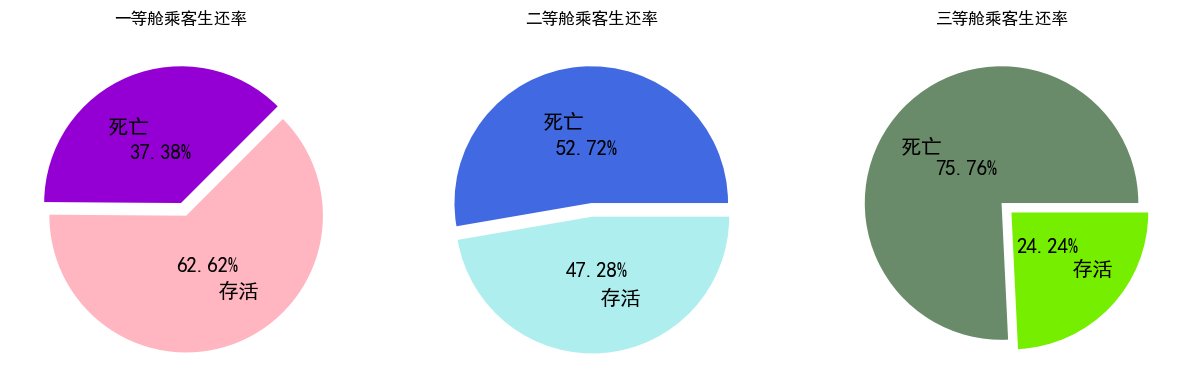

In [87]:
plt.figure(figsize=(3*5,5))

axes1=plt.subplot(1,3,1)
axes1.pie(pclass_count.loc[1][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=45)
axes1.set_title('一等舱乘客生还率')

axes2=plt.subplot(1,3,2)
axes2.pie(pclass_count.loc[2],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#4169E1','#AFEEEE'])
axes2.set_title('二等舱乘客生还率')

axes3=plt.subplot(1,3,3)
axes3.pie(pclass_count.loc[3],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.36,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#698B69','#76EE00'])
axes3.set_title('三等舱乘客生还率')

6. 不同登船港口乘客生还率

In [88]:
embarked_count = train.groupby(by='Embarked')['Survived'].value_counts()
embarked_count

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

Text(0.5, 1.0, '英国南安普顿乘客生还率')

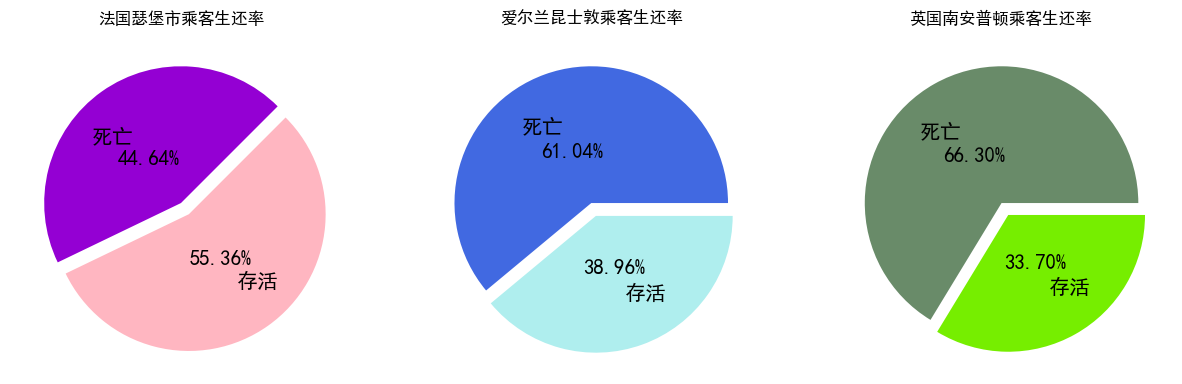

In [90]:
plt.figure(figsize=(3*5,5))

axes1=plt.subplot(1,3,1)
axes1.pie(embarked_count.loc['C'][::-1],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#9400D3','#FFB6C1'],startangle=45)
axes1.set_title('法国瑟堡市乘客生还率')

axes2=plt.subplot(1,3,2)
axes2.pie(embarked_count.loc['Q'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#4169E1','#AFEEEE'])
axes2.set_title('爱尔兰昆士敦乘客生还率')

axes3=plt.subplot(1,3,3)
axes3.pie(embarked_count.loc['S'],autopct='%.2f%%',labels=['死亡','存活'],pctdistance=0.4,labeldistance=0.6,
       explode=[0,0.1],textprops=dict(size=15),colors=['#698B69','#76EE00'])
axes3.set_title('英国南安普顿乘客生还率')

叫我期待 重新振作起来 别让自己后悔 把眼泪收回 不跟谁斗苦斗累